## Exploratory Data Analyisis

In [1]:
#!pip install pyarrow modin 

In [2]:
#import modin.pandas as pd
#df = pd.read_csv('https://s3.eu-central-1.amazonaws.com/maastrichtuniversity-ids-open/lex2rdf/cases_full.csv',
#                dtype={"year_lodge": object, "month_lodge": object})

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [92]:
metadata = pd.read_csv('../data/cases_metadata.csv')
countries = pd.read_csv('../data/countries.csv')
subjects = pd.read_csv('../data/subjects.csv')
citations = pd.read_csv('../data/citations.csv')
#citations['paragraph'] = citations['target'] + '-' + citations['paragraph']

In [5]:
metadata.columns

Index(['source', 'case_label', 'ecli', 'case_type', 'judge', 'advocate',
       'country', 'country-chamber', 'chamber', 'main_subject', 'lodge_date',
       'document_date', 'year_document', 'month_document', 'year_lodge',
       'month_lodge', 'case_time', 'n_countries', 'joined_cases',
       'ruling_title', 'ruling_name', 'ruling_type', 'ruling_content'],
      dtype='object')

In [7]:
len(metadata['source'].unique())

13357

In [8]:
len(metadata['case_label'].unique())

13223

In [9]:
len(metadata['ecli'].unique())

13357

In [16]:
metadata.groupby('case_type').count()['source']

case_type
Judgement    11374
Order         1983
Name: source, dtype: int64

In [27]:
len(metadata['judge'].unique())

98

In [28]:
len(metadata[metadata['year_document'] >=2017]['judge'].unique())

27

In [23]:
metadata.groupby('judge').count()['source'].sort_values(ascending=False).head()

judge
Rosas                  285
Jann                   280
Moitinho de Almeida    272
Toader                 269
IleÅ¡iÄ               268
Name: source, dtype: int64

In [83]:
metadata[metadata['joined_cases'] ==1].groupby('judge').count()['source'].sort_values(ascending=False).head()
#What happen with joined cases

judge
Koopmans               29
Due                    28
Moitinho de Almeida    28
Pescatore              27
Gulmann                26
Name: source, dtype: int64

In [30]:
len(metadata['advocate'].unique())

111

In [31]:
len(metadata[metadata['year_document'] >=2017]['advocate'].unique())

25

In [32]:
metadata.groupby('advocate').count()['source'].sort_values(ascending=False).head()

advocate
Kokott       774
Mengozzi     646
Bot          640
Sharpston    626
Jacobs       609
Name: source, dtype: int64

In [72]:
len(countries['country'].unique())

63

In [73]:
countries.groupby('country').count()['source'].sort_values(ascending=False).head()

country
Germany          2651
Italy            1678
not_specified    1437
France           1276
Netherlands      1109
Name: source, dtype: int64

In [74]:
len(countries)

14100

In [77]:
merge_1 = countries.merge(metadata.loc[:, metadata.columns != 'country'], on='source', how='left')
len(merge_1)

14100

This can be exploted in tableau

In [47]:
merge_[merge_['year_document']>=2017].groupby('subject').count()['source'].sort_values(ascending=False).head()

subject
Approximation of laws          339
Right of establishment         241
Freedom to provide services    191
Taxation                       136
Competition                    113
Name: source, dtype: int64

In [37]:
metadata[metadata['year_document']>=2000].groupby('country-chamber').count()['source'].sort_values(ascending=False).head()

country-chamber
Germany-First Chamber     189
Germany-Second Chamber    181
Germany-Fifth Chamber     172
Germany-Third Chamber     170
Germany-Sixth Chamber     143
Name: source, dtype: int64

In [63]:
years = sorted(metadata['year_document'].unique())
nan_chamber = []
for year in years:
    group = metadata[metadata['year_document'] == year].groupby('chamber').count()
    nan_chamber.append(group.loc['not_specified']['source']/group['source'].sum()*100)

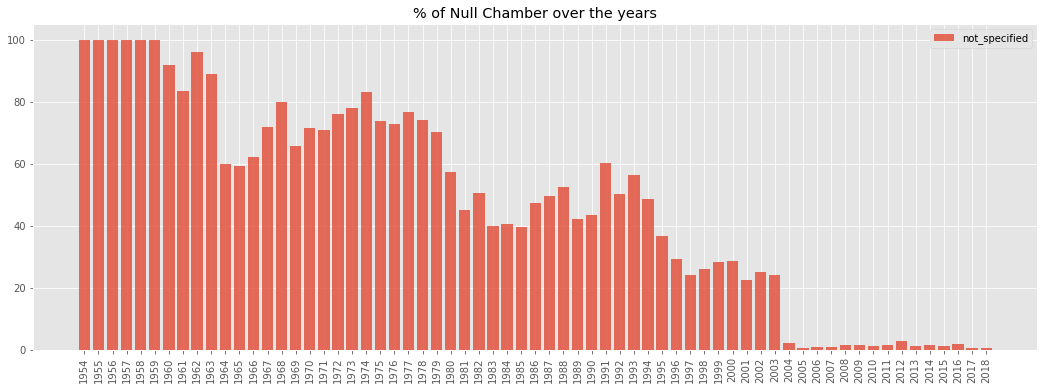

In [66]:
plt.figure(figsize=(18, 6))
position = range(len(years))
plt.bar(position, nan_chamber, align='center', alpha=0.8, label='not_specified')
plt.xticks(position, years, rotation=90)
plt.legend(loc='best')
plt.title('% of Null Chamber over the years')
plt.show()

In [42]:
len(subjects['subject'].unique())

181

In [41]:
subjects.groupby('subject').count()['source'].sort_values(ascending=False).head()

subject
Approximation of laws          4401
Agriculture and Fisheries      3182
Right of establishment         3149
Freedom to provide services    2966
Free movement of goods         2654
Name: source, dtype: int64

In [44]:
len(subjects)

54897

In [45]:
merge_ = subjects.merge(metadata, on='source', how='left')
len(merge_)

54897

In [47]:
merge_[merge_['year_document']>=2017].groupby('subject').count()['source'].sort_values(ascending=False).head()

subject
Approximation of laws          339
Right of establishment         241
Freedom to provide services    191
Taxation                       136
Competition                    113
Name: source, dtype: int64

A plot of top 10 subject matters over the years

In [49]:
metadata.groupby('year_document').count()['source'].sort_values(ascending=False).head()

year_document
2016    587
2013    564
2017    556
2014    544
2015    509
Name: source, dtype: int64

A plot of relative values of judgements and orders over the time (ilustrative, we expect every country behaves the same)

In [61]:
pd.to_datetime(metadata['lodge_date'],format= '%Y/%m/%d').head()

0   1997-04-17
1   1995-02-10
2   1995-03-13
3   1994-11-22
4   1998-07-24
Name: lodge_date, dtype: datetime64[ns]

In [62]:
metadata['lodge_date'] = pd.to_datetime(metadata['lodge_date'],format= '%Y/%m/%d')
metadata['document_date'] = pd.to_datetime(metadata['document_date'],format= '%Y/%m/%d')

In [70]:
metadata['case_time'] = metadata['document_date'] - metadata['lodge_date']

In [71]:
metadata['case_time'].describe()

count                       13357
mean     531 days 13:57:59.793366
std      283 days 06:17:24.710953
min               0 days 00:00:00
25%             349 days 00:00:00
50%             510 days 00:00:00
75%             671 days 00:00:00
max            3954 days 00:00:00
Name: case_time, dtype: object

A plot of the time of the case over the time of the top 5 countries

In [5]:
metadata.columns

Index(['source', 'case_label', 'ecli', 'case_type', 'judge', 'advocate',
       'country', 'country-chamber', 'chamber', 'main_subject', 'lodge_date',
       'document_date', 'year_document', 'month_document', 'year_lodge',
       'month_lodge', 'case_time', 'n_countries', 'joined_cases',
       'ruling_title', 'ruling_name', 'ruling_type', 'ruling_content'],
      dtype='object')

In [88]:
metadata.groupby('ruling_name').count()['source'].sort_values(ascending=False).head()

ruling_name
 Commission of the European Communities v Italian Republic.                346
 Commission of the European Communities v French Republic.                 192
 Commission of the European Communities v Kingdom of Belgium.              182
 Commission of the European Communities v Hellenic Republic.               158
 Commission of the European Communities v Federal Republic of Germany.     127
Name: source, dtype: int64

In [89]:
metadata.groupby('ruling_type').count()['source'].sort_values(ascending=False).head()

ruling_type
not_specified                                                             6621
 Reference for a preliminary ruling: Bundesfinanzhof - Germany.            176
 Reference for a preliminary ruling: Finanzgericht Hamburg - Germany.       88
 Reference for a preliminary ruling: Bundesgerichtshof - Germany.           80
 Reference for a preliminary ruling: Hoge Raad - Netherlands.               72
Name: source, dtype: int64

In [90]:
metadata.groupby('ruling_content').count()['source'].sort_values(ascending=False).head()

ruling_content
 Taxation of costs.                                                 43
 Inadmissibility.                                                   42
 Removal from the register.                                         28
 Reference for a preliminary ruling: Bundesfinanzhof - Germany.     23
 Additional levy on milk.                                           23
Name: source, dtype: int64

In [95]:
citations['relation'] = citations['source']+'-'+citations['target']
citations['unique'] = citations['source']+'-'+citations['target']+'-'+citations['paragraph']
citations['citation'] = citations['target']+'-'+citations['paragraph']

In [105]:
citations.head()

,source,target,paragraph,relation,unique,citation
0,62016CJ0267,61987CJ0215,N22,62016CJ0267-61987CJ0215,62016CJ0267-61987CJ0215-N22,61987CJ0215-N22
1,62016CJ0267,61987CJ0215,N67,62016CJ0267-61987CJ0215,62016CJ0267-61987CJ0215-N67,61987CJ0215-N67
2,62016CJ0267,62001CJ0030,N63,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N63,62001CJ0030-N63
3,62016CJ0267,62001CJ0030,N34,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N34,62001CJ0030-N34
4,62016CJ0267,62001CJ0030,N53,62016CJ0267-62001CJ0030,62016CJ0267-62001CJ0030-N53,62001CJ0030-N53


#### Unique paragraph citations  (target-paragraph)

In [96]:
df_citations = citations.groupby('citation').agg('count')['source'].reset_index()

In [97]:
df_citations.sort_values(['source'], ascending=False).head(10)

,citation,source
21262,61990CJ0320-N06,48
2279,61974CJ0008-N5,47
84075,62010CJ0072-N6,46
25199,61992CO0157-N04,40
18484,61989CJ0106-N08,36
87694,62010CJ0617-N19,36
23136,61991CJ0267-N16,35
1203,61970CJ0022-N42,34
14493,61986CJ0267-N16,33
23918,61992CJ0091-N26,30


The most cited [paragraph](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528814213715&uri=CELEX:61974CJ0008)

#### Unique cited cases (target -> source)

In [98]:
df_ = citations.groupby(['target','source']).agg('count')['citation'].reset_index()
df_target = df_.groupby('target')['citation'].agg(['count','sum']).reset_index()
df_target.columns = ['target','sources','target_paragraphs']

In [99]:
df_target.sort_values('sources',ascending=False).head(10)

,target,sources,target_paragraphs
4363,61998CJ0352,165,275
3214,61993CJ0415,159,521
5449,62002CJ0189,149,406
4382,61998CJ0379,128,306
428,61974CJ0008,128,341
2992,61992CJ0136,105,206
4879,62000CJ0204,87,189
2697,61990CJ0320,85,267
3568,61995CJ0185,80,185
5892,62003CJ0551,80,117


The most cited [case](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528816320947&uri=CELEX:61993CJ0415)

#### Unique relations (source -> target)

In [100]:
#table on relation level
df_relations = citations.groupby(['source','relation']).agg('count')['paragraph'].reset_index()

In [101]:
#it is necessary to revise the methodology since it's poossible to check the number of paragrphs in eu-lex, and may not match ith the count method
#df_relations.sort_values(['paragraph'], ascending=False).head(10)

In [102]:
df_source = df_relations.groupby('source')['paragraph'].agg(['count','sum']).reset_index() 
df_source.columns = ['source','targets','source_paragraphs']

In [103]:
df_source.sort_values(['targets'], ascending=False).head(10)

,source,targets,source_paragraphs
7634,62010CJ0539,55,222
8569,62012CJ0382,50,140
5601,62005CJ0341,49,240
6704,62008CJ0384,49,59
9872,62015CJ0072,48,260
5875,62006CJ0268,44,83
5964,62006CJ0413,44,61
7567,62010CJ0416,44,100
6642,62008CJ0280,44,66
6187,62007CJ0208,42,144


The case that cites the [most](https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1528817250200&uri=CELEX:62010CJ0539)

Make  function to automate dataset creation from pandas queries that can be consumed by tableau or neo4j